In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv


# Load Dataset

In [2]:
data = pd.read_csv('/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv')

print('Total data')
print(data.shape)
print('Real jobs')
print(data[data['fraudulent']==0].shape)
print('Fake jobs')
print(data[data['fraudulent']==1].shape)

Total data
(17880, 18)
Real jobs
(17014, 18)
Fake jobs
(866, 18)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sb

# Exploratory Data Analysis

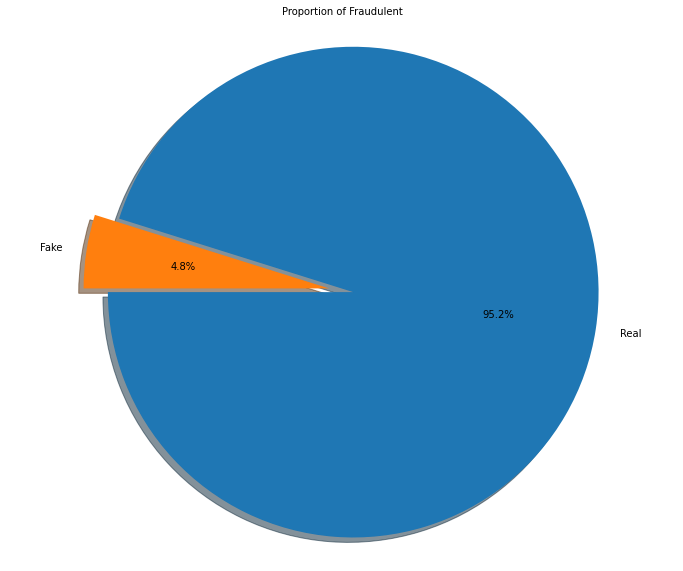

In [4]:
labels = 'Real', 'Fake'
sizes = [data.fraudulent[data['fraudulent']== 0].count(), data.fraudulent[data['fraudulent']== 1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(12, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')
plt.title("Proportion of Fraudulent", size = 10)
plt.show()

In [5]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [7]:
del data["salary_range"]
del data["job_id"]

Text(0.5, 1.0, 'employment type vs fake')

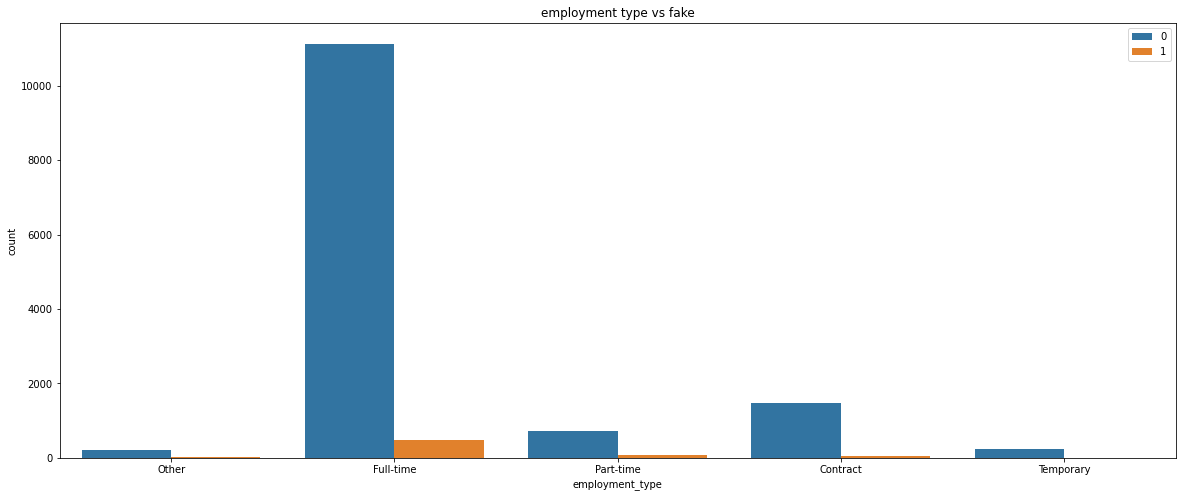

In [8]:
plt.figure(1,figsize=(20,8))
sb.countplot(hue=data.fraudulent,x=data.employment_type)
plt.legend(loc='upper right')
plt.title('employment type vs fake')

Text(0.5, 1.0, 'experience vs fake')

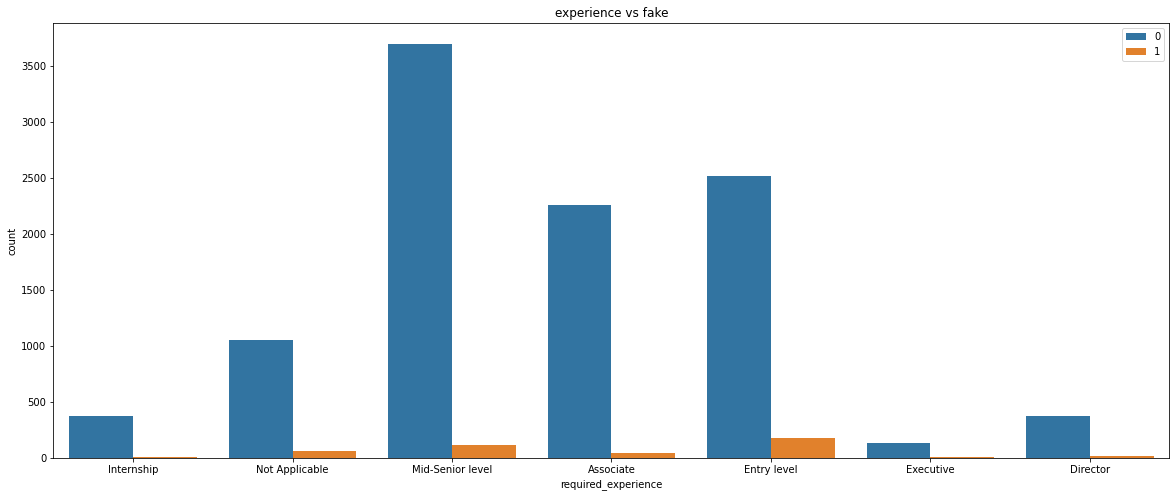

In [9]:
plt.figure(1,figsize=(20,8))
sb.countplot(hue=data.fraudulent,x=data.required_experience)
plt.legend(loc='upper right')
plt.title('experience vs fake')

Text(0.5, 1.0, 'education vs fake')

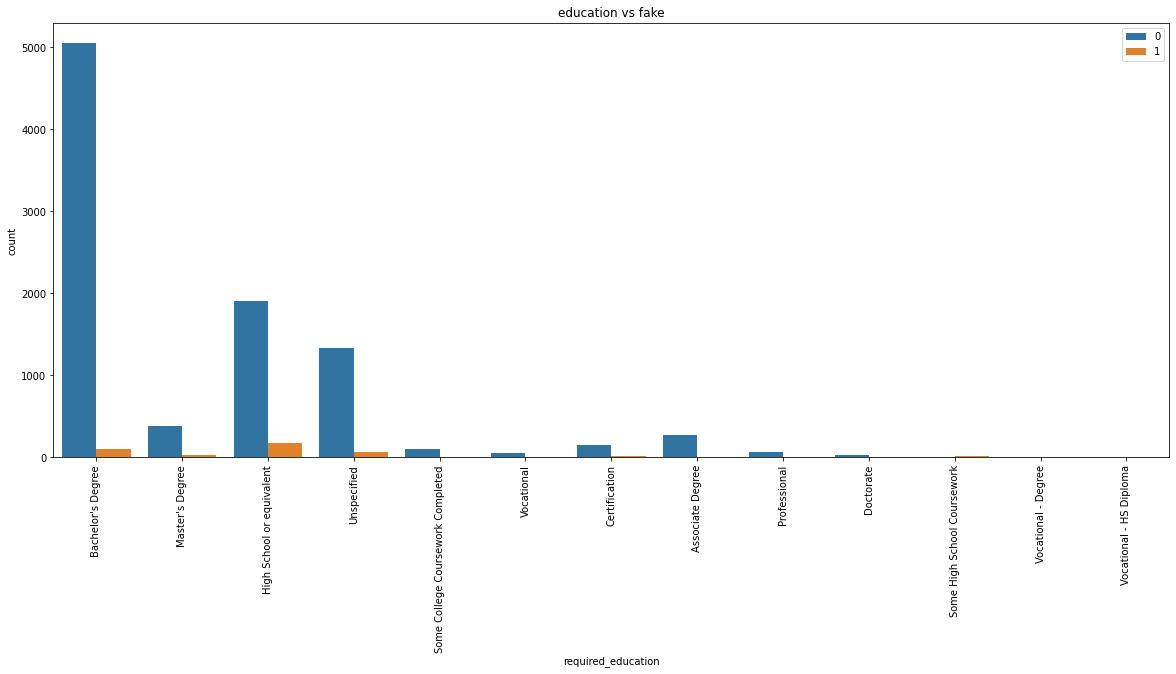

In [10]:
plt.figure(1,figsize=(20,8))
plt.xticks(rotation='90')
sb.countplot(hue=data.fraudulent,x=data.required_education)
plt.legend(loc='upper right')
plt.title('education vs fake')

Text(0.5, 1.0, 'telecommuting vs fake')

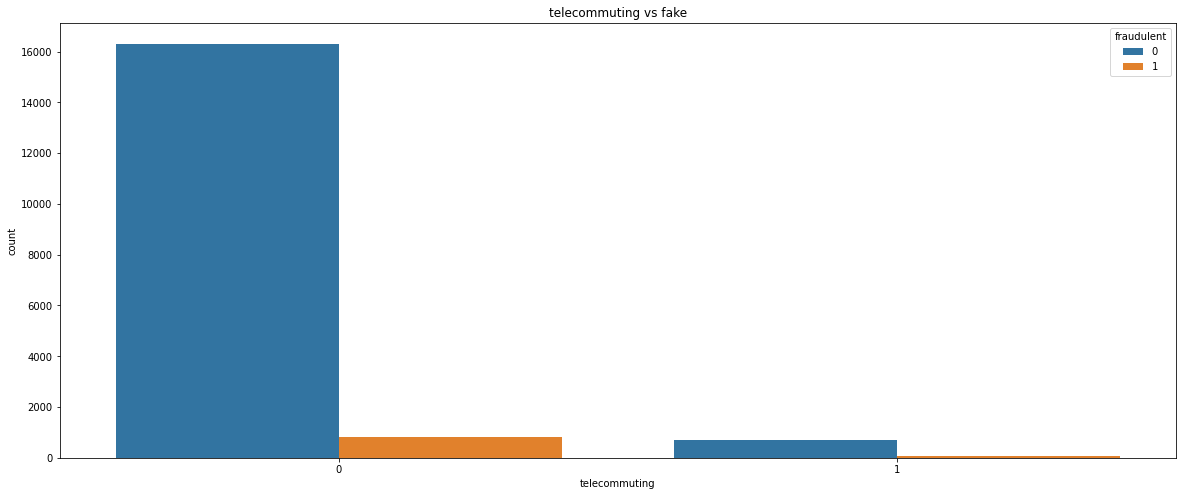

In [11]:
plt.figure(1,figsize=(20,8))
sb.countplot(hue=data.fraudulent,x=data.telecommuting)
plt.title('telecommuting vs fake')

Text(0.5, 1.0, 'logo vs fake')

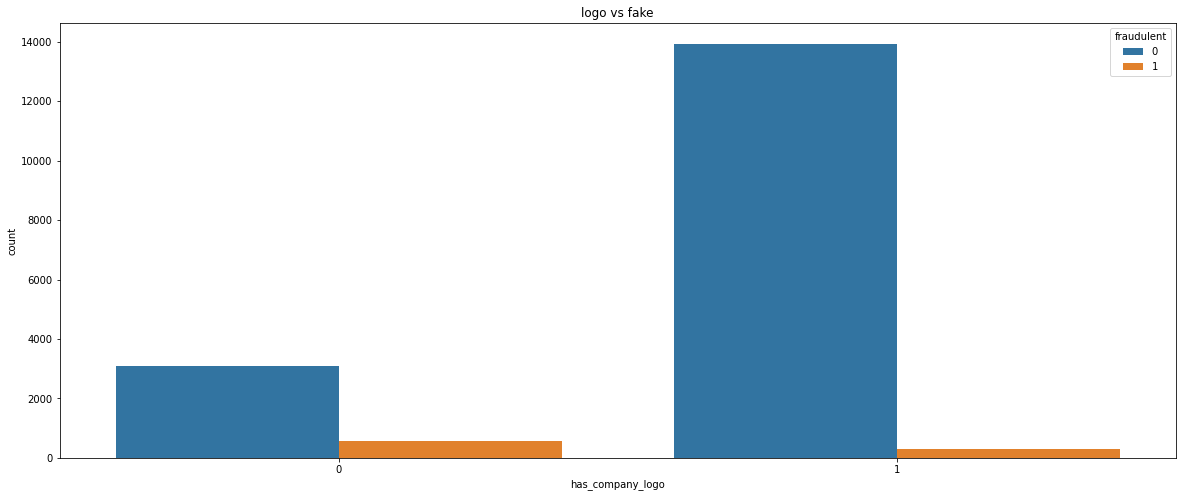

In [12]:
plt.figure(1,figsize=(20,8))
sb.countplot(hue=data.fraudulent,x=data.has_company_logo)
plt.title('logo vs fake')

Text(0.5, 1.0, 'question vs fake')

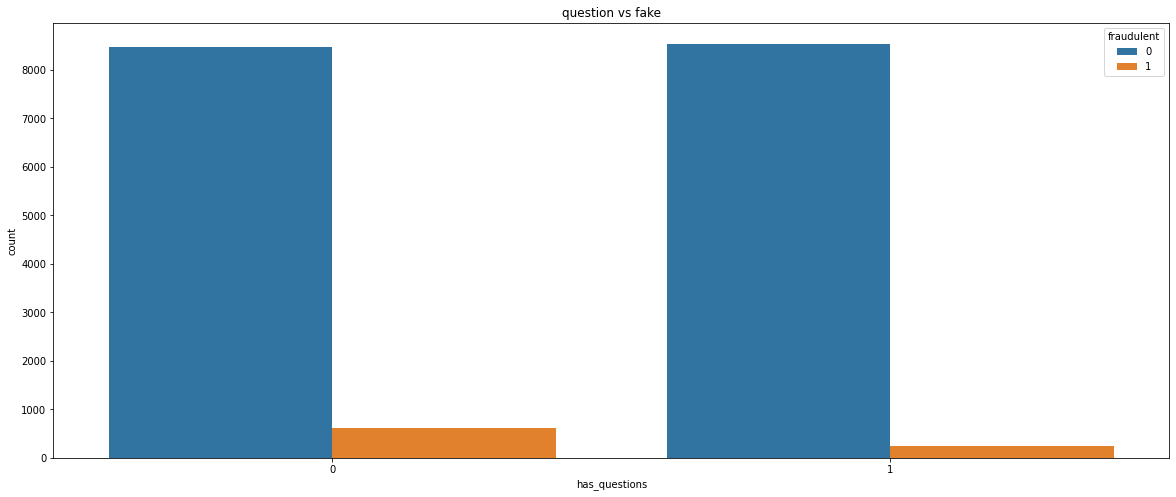

In [13]:
plt.figure(1,figsize=(20,8))
sb.countplot(hue=data.fraudulent,x=data.has_questions)
plt.title('question vs fake')

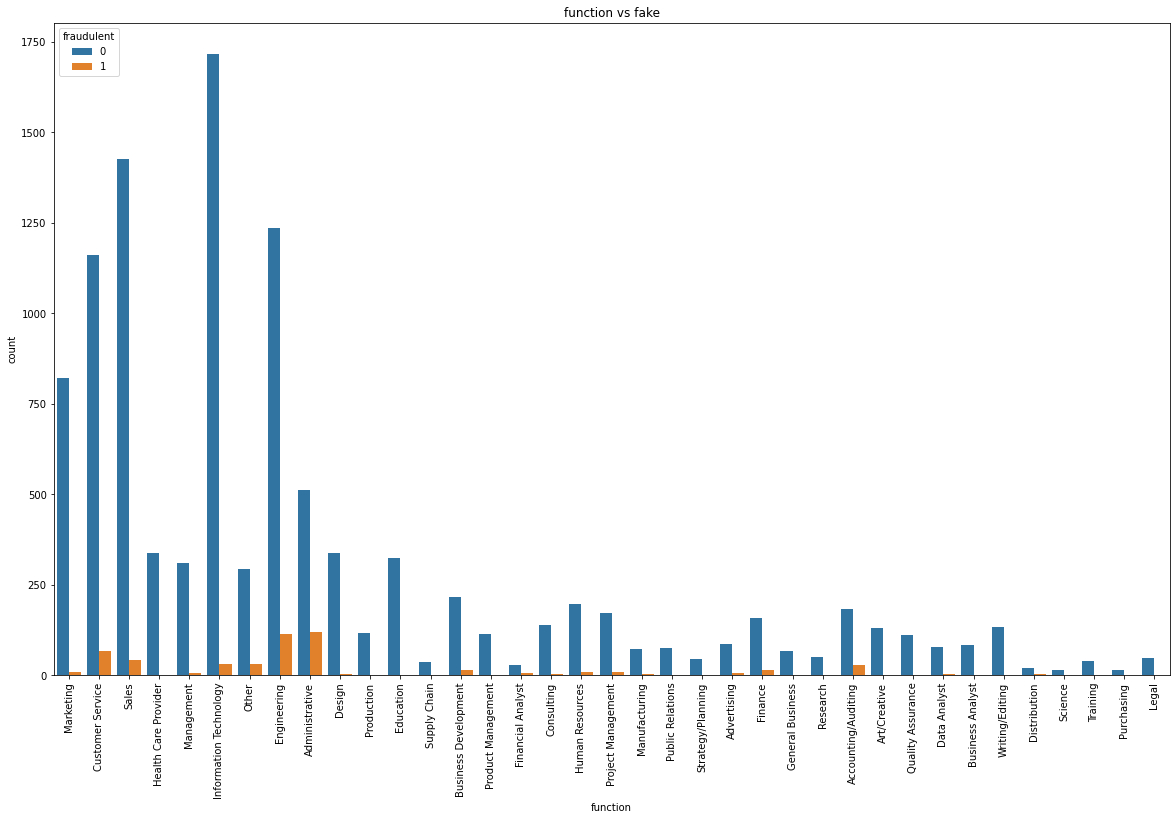

In [14]:
plt.figure(1,figsize=(20,12))
plt.xticks(rotation='90')
sb.countplot(x=data.function,hue=data.fraudulent);
plt.title('function vs fake');

# Under Sampling to balance Data

In [15]:
columns = data.columns.tolist()
columns = [c for c in columns if c not in ["fraudulent"]]
target = "fraudulent"
state = np.random.RandomState(42)
X = data[columns]
Y = data["fraudulent"]

from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_rus, y_rus = under_sampler.fit_resample(X, Y)

df1 = pd.DataFrame(X_rus) 
df2 = pd.DataFrame(y_rus)

result = pd.concat([df1, df2], axis=1, join='inner')
display(result)
data=result;

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Informatica MDM- Business Analyst,"US, NJ, Avenel",NaN,RHB Recruitment Ltd is a business process outs...,"Skill(s)Business Analysis (L2) , Statistical A...",Business Analysis(L2)-The role focuses on comm...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
1,Front End Developer,"GR, , Athens",Tech,Daily Secret is one of the fastest growing dig...,Daily Secret is seeking a Front End Developer ...,Strong experience building solutions in WordPr...,We offer...first-hand experience at a fast-gro...,0,1,1,NaN,Associate,Bachelor's Degree,Internet,Engineering,0
2,Director of Patient Care Services,"US, TX, Austin",Texas Home Health,I am AccentCare…I am Patient Focused. It is r...,I am AccentCare…I am Patient Focused. It is r...,"As part of this team, the DPCS will:Supervis...",Join Our TeamAccentCare is committed to excel...,0,1,0,Full-time,Not Applicable,Certification,Hospital & Health Care,Health Care Provider,0
3,"Full-Time Caregiver (Position B) for a Shy, Sw...","US, OR, Lake Oswego",NaN,United Cerebral Palsy of Oregon &amp; SW Washi...,Are you looking for something a little differe...,Be able to drive on the job—this means that yo...,"$9.47/hour, with 5% increase to $9.95/hour aft...",0,1,1,Full-time,Entry level,High School or equivalent,Civic & Social Organization,Health Care Provider,0
4,Technical Recruiter,"GB, LND, London",HR,Want to build a 21st century financial service...,TransferWise is the clever new way to move mon...,We’re looking for someone who:Proven track rec...,Apart from all-expenses-paid company holidays ...,0,1,0,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",NaN,NaN,Student Positions Part-Time and Full-Time.You ...,NaN,NaN,0,0,0,Part-time,NaN,NaN,NaN,NaN,1
1728,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,NaN,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1729,Android Developer,"PL, MZ, Warsaw",NaN,NaN,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,0,0,0,NaN,NaN,NaN,NaN,NaN,1
1730,Payroll Clerk,"US, NY, New York",NaN,NaN,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,0,0,0,Full-time,NaN,NaN,Apparel & Fashion,Accounting/Auditing,1


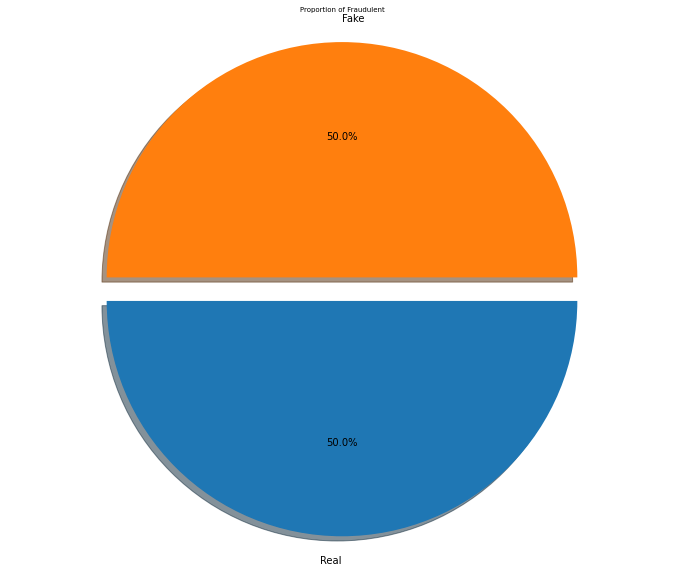

In [16]:
labels = 'Real', 'Fake'
sizes = [data.fraudulent[data['fraudulent']== 0].count(), data.fraudulent[data['fraudulent']== 1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(12, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')
plt.title("Proportion of Fraudulent", size = 7)
plt.show()

# Data Preprocessing

In [17]:
data.fillna(" ",inplace = True)
data['text']=data['title']+" "+data['location']+" "+data['department']+" "+data['company_profile']+" "+data['description']+" "+data['requirements']+" "+data['benefits']+" "+data['employment_type']+" " +data['required_education']+" "+data['industry']+" "+data['function'] 

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['employment_type']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']

data.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text
0,0,0,0,0,"Informatica MDM- Business Analyst US, NJ, Aven..."
1,0,1,1,0,"Front End Developer GR, , Athens Tech Daily Se..."
2,0,1,0,0,"Director of Patient Care Services US, TX, Aust..."
3,0,1,1,0,"Full-Time Caregiver (Position B) for a Shy, Sw..."
4,0,1,0,0,"Technical Recruiter GB, LND, London HR Want t..."


In [18]:
import re

data['text']= data['text'].str.replace('\n',' ')
data['text']= data['text'].str.replace('\r',' ')
data['text']= data['text'].str.replace('\t',' ')
data['text'] = data['text'].apply(lambda x: re.sub(r'[0-9]',' ',x))
data['text'] = data['text'].apply(lambda x: re.sub(r'[/(){}\[\]\|@,;.:-]',' ',x))
data['text']= data['text'].apply(lambda s:s.lower() if type(s) == str else s)
data['text']= data['text'].str.replace('  ',' ')

In [19]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

print(stopwords.words("english"))

stop_words = set(stopwords.words("english"))
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))
data['text'][0]

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any'

"informatica mdm business analyst us nj avenel rhb recruitment ltd business process outsourcing company state art delivery center existing capacity positions seaters prestigious building nexteracom ebene city mauritius rhb recruitment ltd tailor made customized portfolio services clients areas recruitment hr resource management bagatelle recruitment unique combination local knowledge global expertise focused committed approach contract staffing interim management permanent search selection recruitment services means always supply high quality candidates worldwide client base rhb recruitment ltd highly trained workforce multilingual french english main languages enable clients save % costs global economies scale operational efficiencies good risk management coming soon expanding capacity positions october setting offices africa asia constructing sqft state art building ebene city provide business continuity services clients across globe specialtiesrecruitment services contract permanent

In [20]:
data

,telecommuting,has_company_logo,has_questions,fraudulent,text
0,0,0,0,0,informatica mdm business analyst us nj avenel ...
1,0,1,1,0,front end developer gr athens tech daily secre...
2,0,1,0,0,director patient care services us tx austin te...
3,0,1,1,0,full time caregiver position b shy sweet young...
4,0,1,0,0,technical recruiter gb lnd london hr want buil...
...,...,...,...,...,...
1727,0,0,0,1,student positions part time full time us ca lo...
1728,0,0,1,1,sales associate au nsw sydney sales marketing ...
1729,0,0,0,1,android developer pl mz warsaw infullmobile sp...
1730,0,0,0,1,payroll clerk us ny new york job descriptionwe...


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features=2000)
df = pd.DataFrame(tf.fit_transform(data['text']).toarray(),columns=tf.get_feature_names_out())
data.drop(['text'],axis=1,inplace=True)
main_df = pd.concat([df,data],axis=1)

In [22]:
main_df.head()

,________________________________________don,aa,ab,abilities,ability,able,abroad,ac,academic,accepting,...,με,να,που,σε,την,το,telecommuting,has_company_logo,has_questions,fraudulent
0,0.0,0.0,0.0,0.0,0.0,0.023625,0.0,0.037084,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
2,0.0,0.0,0.0,0.0,0.0,0.050779,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.052561,0.0,0.041252,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0


# Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

columns = main_df.columns.tolist()
columns = [c for c in columns if c not in ["fraudulent"]]
target = "fraudulent"
state = np.random.RandomState(42)
X = main_df[columns]
Y = main_df["fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(main_df[columns], main_df.fraudulent, test_size=0.3)

In [24]:
X_train

,________________________________________don,aa,ab,abilities,ability,able,abroad,ac,academic,accepting,...,και,με,να,που,σε,την,το,telecommuting,has_company_logo,has_questions
1291,0.0,0.0,0.0,0.073791,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
419,0.0,0.0,0.0,0.000000,0.019619,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
250,0.0,0.0,0.0,0.000000,0.028308,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0
538,0.0,0.0,0.0,0.000000,0.068711,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
507,0.0,0.0,0.0,0.000000,0.046584,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,0.0,0.0,0.0,0.000000,0.022460,0.025836,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
656,0.0,0.0,0.0,0.000000,0.057157,0.032874,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
429,0.0,0.0,0.0,0.000000,0.023358,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
882,0.0,0.0,0.0,0.000000,0.047261,0.054365,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1


In [25]:
y_train

1291    1
419     0
250     0
538     0
507     0
       ..
676     0
656     0
429     0
882     1
1003    1
Name: fraudulent, Length: 1212, dtype: int64

# Classification Models

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, mean_absolute_error, make_scorer 

## Random Forest Classifier

In [27]:
rfc = RandomForestClassifier(n_estimators=2000,bootstrap=True)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000)

In [28]:
rf_pred = rfc.predict(X_test)

f1_score(y_test, rf_pred.round(), average = 'macro')
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       267
           1       0.91      0.92      0.92       253

    accuracy                           0.92       520
   macro avg       0.92      0.92      0.92       520
weighted avg       0.92      0.92      0.92       520



## Logistic Regression

In [29]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [30]:
lr_pred = lr.predict(X_test)

f1_score(y_test, lr_pred.round(), average = 'macro')
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       267
           1       0.86      0.91      0.88       253

    accuracy                           0.88       520
   macro avg       0.88      0.88      0.88       520
weighted avg       0.88      0.88      0.88       520



## Multinomial Naive Bayes

In [31]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [32]:
nb_pred = nb.predict(X_test)

f1_score(y_test, nb_pred.round(), average = 'macro')
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       267
           1       0.89      0.84      0.87       253

    accuracy                           0.88       520
   macro avg       0.88      0.87      0.87       520
weighted avg       0.88      0.88      0.87       520



## k-Nearest Neighbors (k=3)

In [33]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
knn_pred = knn.predict(X_test)

f1_score(y_test, knn_pred.round(), average = 'macro')
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       267
           1       0.85      0.91      0.88       253

    accuracy                           0.88       520
   macro avg       0.88      0.88      0.88       520
weighted avg       0.88      0.88      0.88       520



## k-Nearest Neighbors (k=5)

In [35]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(X_train,y_train)

KNeighborsClassifier()

In [36]:
knn5_pred = knn5.predict(X_test)

f1_score(y_test, knn5_pred.round(), average = 'macro')
print(classification_report(y_test, knn5_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       267
           1       0.84      0.91      0.87       253

    accuracy                           0.87       520
   macro avg       0.87      0.87      0.87       520
weighted avg       0.87      0.87      0.87       520



## Hyperparameter Tuning (kNN)

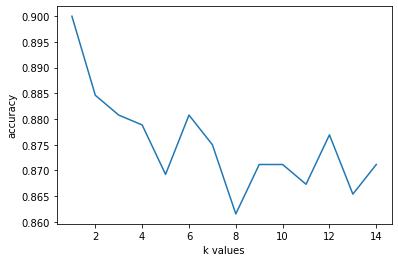

In [37]:
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

# Save Model for Web App

In [38]:
import pickle

filename = 'rfc_final.pkl'
pickle.dump(rfc, open(filename, 'wb'))
print("Best Model (RFC) Saved as " + filename)

Best Model (RFC) Saved as rfc_final.pkl
